In [1]:
# importing the dependencies
# NumPy for numerical mainpulation of the data and matplotlib for plotting the results of our model
import numpy as np
import matplotlib.pyplot as plt

#### Generating random data using NumPy

In [2]:
# Generating a dataset using np.random.multivariate_normal 
# It draws random samples from a multivariate normal distribution given its mean and covariance matrix
mean = np.array([5.0, 6.0])
cov = np.array([[1.0, 0.95], [0.95, 1.0]])
data = np.random.multivariate_normal(mean, cov, 1000)
# data.shape

<AxesSubplot:>

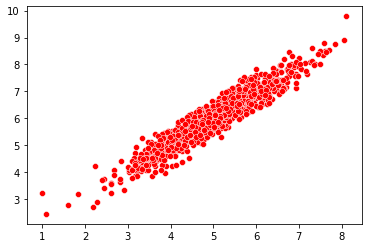

In [3]:
# Plotting the data in a scatter plot using seaborn 
import seaborn as sns
x_vals = data[:, 0]
y_vals = data[:, 1]
sns.scatterplot(x=x_vals, y=y_vals, color='r')

In [4]:
# We could have scaled/normalized our data but we won't since we only have one attribute column
# from sklearn.preprocessing import StandardScaler
# scalar = StandardScaler()
# on checking it might improve the accuracy but for a univariate model, let's just keep the simplicity maintained

#### Splitting and Reshaping for future calculations

In [5]:
# Splitting the data into training and testing set without using sklearn.preprocessing
# Already the values obtained from np.random.multivariate_normal are in a random order and thus
# there is no need to shuffle the data again. So we will do a 9:1 split for the training and testing data
X_train = x_vals[:int(len(x_vals)*0.9)]
y_train = y_vals[:int(len(y_vals)*0.9)]
X_test = x_vals[-int(len(x_vals)*0.1):]
y_test = y_vals[-int(len(y_vals)*0.1):]

# For using linear regression and specifically for calculating the hypothesis we will generate 
# theta(parameter values) starting from theta_0. So we must define a new column in the training data
# say X_0 where all the values are initialized to 1 so now the training and testing data sets have an 
# additional column.
X_train = np.hstack((np.ones(((len(X_train)), 1)), X_train.reshape(-1,1)))
X_test = np.hstack( ((np.ones((len(X_test), 1))), X_test.reshape(-1,1)) )
print("New dimensions of X_train =", X_train.shape)
print("New dimensions of X_test =", X_test.shape)

New dimensions of X_train = (900, 2)
New dimensions of X_test = (100, 2)


In [6]:
# Mention about theta
# theta will be declared locally for the first time in the gradient descent function and then
# returned to a new variable in the global scope named theta_updated, same for cost

### **Batch Gradient Descent Methodology**

In [7]:
def hypothesis(X_train, theta):
    #            (m, 2) , (2, 1)
    return np.dot(X_train, theta)

In [8]:
# in the case of batch gradient descent, we will calculate the mean cost for all the training samples
# at a time for a given theta values, so we will find the mean
def cost(X_train, y_train, theta):
    m = len(X_train)
    h = hypothesis(X_train, theta)
    cost = (0.5/m)*( np.sum((h-y_train)**2)  )
    return cost

In [9]:
def batch_gradient_descent(X_train, y_train, learning_rate = 0.001, epoch=100):
    m = len(X_train)
    theta = np.zeros((X_train.shape[1], 1)) # [[0, 0]]
    costs = [] # will store the new_cost values after every 10 iterations of optimization
    epochs = [] # will store the iteration number
    for i in range(epoch):
        h = hypothesis(X_train, theta)
        theta = theta - (learning_rate/m) * np.dot(X_train.transpose(), np.subtract(h,y_train.reshape(-1,1)))
        new_cost = cost(X_train, y_train, theta)
        if i%10==0:
            epochs.append(i+1)
            costs.append(new_cost)
        
    plt.plot(epochs, costs)    
    return theta, new_cost

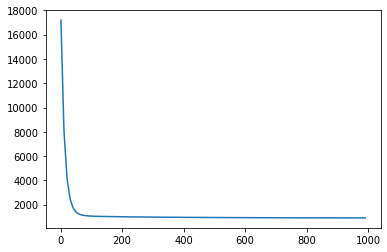

In [10]:
theta_updated, cost_updated = batch_gradient_descent(X_train, y_train, 0.073, 1000)

In [11]:
print("Theta_0 =", theta_updated[0])
print("Theta_1 =", theta_updated[1])
print("The cost incurred by the model", cost_updated)

Theta_0 = [1.18458258]
Theta_1 = [0.96257214]
The cost incurred by the model 901.3298665506072


#### Performance on the training data

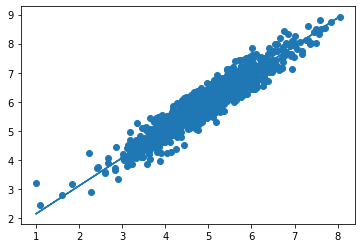

In [12]:
plt.scatter(X_train[:, 1], y_train)
plt.plot(X_train[:,1], hypothesis(X_train, theta_updated).flatten())

#### Performance on the testing data

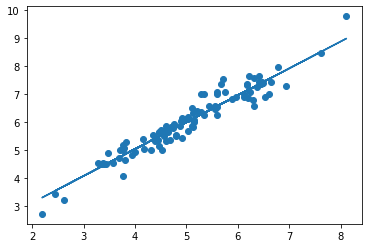

In [13]:
plt.scatter(X_test[:, 1], y_test)
plt.plot(X_test[:, 1], hypothesis(X_test, theta_updated))

In [14]:
print("The cost on the testing data is =", cost(X_test, y_test, theta_updated))

The cost on the testing data is = 126.80645952678064
